<a href="https://colab.research.google.com/github/JungAh12/2018_HANYANG/blob/master/OverfittingandUnderfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly-2.0-preview

     |████████████████████████████████| 95.2MB 93kB/s 
     |████████████████████████████████| 3.8MB 42.9MB/s 
     |████████████████████████████████| 450kB 45.8MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-dev20191002


multi-hot encoding으로 변환

multi-hot encoding은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환한다.

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


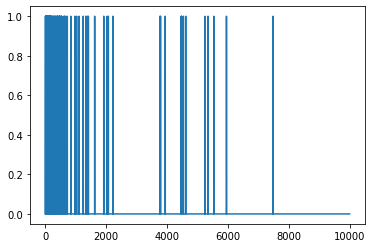

In [4]:
plt.plot(train_data[0])

#overfitting example
overfitting을 막는 간단한 방법 : 모델의 규모 축소하기

learnable parameter 수가 많으면 더 많은 기억 용량을 갖는다.
이런 경우 일반화 능력이 떨어질 수 있다.

그러나 반대로 기억용량이 부족하면 이런 구체적인 매핑이 안되기 때문에 용량의 적절한 균형이 필요하다.

그러나 적절한 크기, 구조를 결정하는 공식은 따로 없어서 여러번 시도해봐야한다.


In [5]:
baseline_model = keras.Sequential([
                                   keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
                                   keras.layers.Dense(16, activation='relu'),
                                   keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4952 - accuracy: 0.8004 - binary_crossentropy: 0.4952 - val_loss: 0.3418 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3418
Epoch 2/20
25000/25000 - 3s - loss: 0.2521 - accuracy: 0.9124 - binary_crossentropy: 0.2521 - val_loss: 0.2842 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2842
Epoch 3/20
25000/25000 - 3s - loss: 0.1845 - accuracy: 0.9355 - binary_crossentropy: 0.1845 - val_loss: 0.2909 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2909
Epoch 4/20
25000/25000 - 3s - loss: 0.1484 - accuracy: 0.9503 - binary_crossentropy: 0.1484 - val_loss: 0.3058 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.3058
Epoch 5/20
25000/25000 - 3s - loss: 0.1236 - accuracy: 0.9600 - binary_crossentropy: 0.1236 - val_loss: 0.3325 - val_accuracy: 0.8760 - val_binary_crossentropy: 0.3325
Epoch 6/20
25000/25000 - 3s - loss: 0.1034 - accuracy: 0.9684 - binary_crossentropy: 0.1034 - val_loss: 0.3620

작은 모델로 학습해보기

In [7]:
smaller_model = keras.Sequential([
                                  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(4, activation='relu'),
                                  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6119 - accuracy: 0.7640 - binary_crossentropy: 0.6119 - val_loss: 0.5303 - val_accuracy: 0.8364 - val_binary_crossentropy: 0.5303
Epoch 2/20
25000/25000 - 3s - loss: 0.4399 - accuracy: 0.8717 - binary_crossentropy: 0.4399 - val_loss: 0.4022 - val_accuracy: 0.8661 - val_binary_crossentropy: 0.4022
Epoch 3/20
25000/25000 - 3s - loss: 0.3249 - accuracy: 0.8981 - binary_crossentropy: 0.3249 - val_loss: 0.3334 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.3334
Epoch 4/20
25000/25000 - 3s - loss: 0.2594 - accuracy: 0.9151 - binary_crossentropy: 0.2594 - val_loss: 0.3005 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.3005
Epoch 5/20
25000/25000 - 3s - loss: 0.2195 - accuracy: 0.9275 - binary_crossentropy: 0.2195 - val_loss: 0.2889 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2889
Epoch 6/20
25000/25000 - 3s - loss: 0.1914 - accuracy: 0.9365 - binary_crossentropy: 0.1914 - val_loss: 0.2845

큰 모델 만들기

In [9]:
bigger_model = keras.models.Sequential([
                                        keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS, )),
                                        keras.layers.Dense(512, activation='relu'),
                                        keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 19s - loss: 0.3443 - accuracy: 0.8529 - binary_crossentropy: 0.3443 - val_loss: 0.3090 - val_accuracy: 0.8752 - val_binary_crossentropy: 0.3090
Epoch 2/20
25000/25000 - 18s - loss: 0.1428 - accuracy: 0.9492 - binary_crossentropy: 0.1428 - val_loss: 0.3296 - val_accuracy: 0.8731 - val_binary_crossentropy: 0.3296
Epoch 3/20
25000/25000 - 18s - loss: 0.0520 - accuracy: 0.9854 - binary_crossentropy: 0.0520 - val_loss: 0.4403 - val_accuracy: 0.8677 - val_binary_crossentropy: 0.4403
Epoch 4/20
25000/25000 - 18s - loss: 0.0087 - accuracy: 0.9986 - binary_crossentropy: 0.0087 - val_loss: 0.5703 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.5703
Epoch 5/20
25000/25000 - 18s - loss: 0.0017 - accuracy: 0.9999 - binary_crossentropy: 0.0017 - val_loss: 0.6648 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.6648
Epoch 6/20
25000/25000 - 18s - loss: 3.9415e-04 - accuracy: 1.0000 - binary_crossentropy: 3.9415e-04 - va

#train loss와 validation loss 그래프 그려보기
실선 - 훈련 손실
점선 - 검증 손실


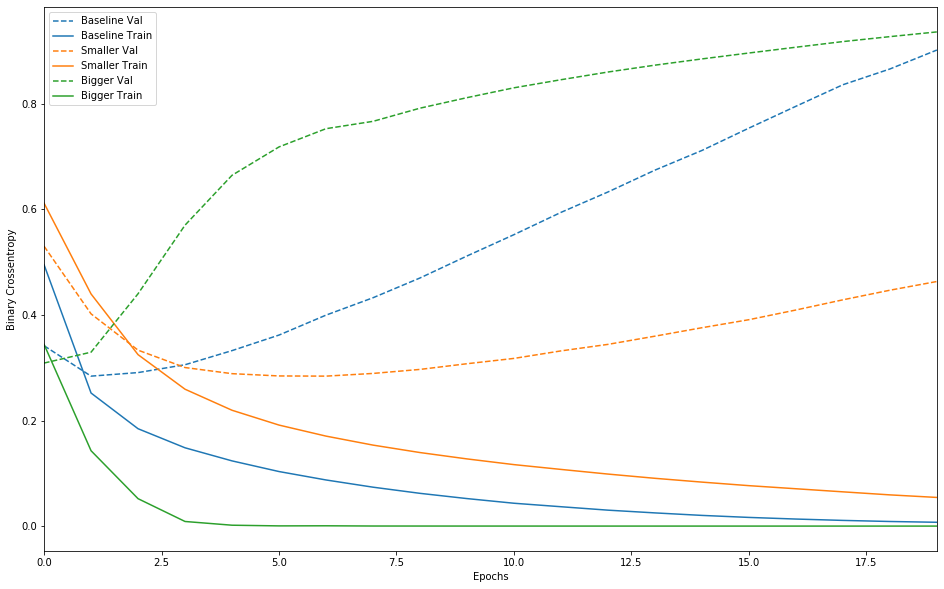

In [12]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
                 ('smaller', smaller_history),
                 ('bigger', bigger_history)])

#오버피팅 방지하기
##가중치 규제하기

간단한 모델은 모델 파라미터의 분포를 봤을 때 **엔트로피가 작은 모델**이다.

###weight regularization
가중치가 작은 값을 갖도록 네트워크의 복잡도에 제약을 가한다.
가중치 값의 분포를 좀 더 균일하게 만들어 준다.

* L1 regularization - 가중치의 절댓값에 비례하는 비용 추가
* L2 regularization - 가중치의 제곱에 비례하는 비용 추가

L1 regularization은 일부 가중치 파라미터를 0으로 만든다.
L2는 아예 0으로 만들진 않아서 L2를 자주 쓴다.

kernel_regularizer를 사용해서 규제를 추가할 수 있다.

In [16]:
l2_model = keras.models.Sequential([
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu', input_shape=(NUM_WORDS, )),
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation='relu'),
                                    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5070 - accuracy: 0.8110 - binary_crossentropy: 0.4656 - val_loss: 0.3675 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3234
Epoch 2/20
25000/25000 - 3s - loss: 0.2949 - accuracy: 0.9111 - binary_crossentropy: 0.2465 - val_loss: 0.3344 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2831
Epoch 3/20
25000/25000 - 3s - loss: 0.2501 - accuracy: 0.9301 - binary_crossentropy: 0.1966 - val_loss: 0.3410 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2856
Epoch 4/20
25000/25000 - 3s - loss: 0.2273 - accuracy: 0.9401 - binary_crossentropy: 0.1702 - val_loss: 0.3543 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.2962
Epoch 5/20
25000/25000 - 3s - loss: 0.2141 - accuracy: 0.9478 - binary_crossentropy: 0.1550 - val_loss: 0.3742 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3142
Epoch 6/20
25000/25000 - 3s - loss: 0.2033 - accuracy: 0.9516 - binary_crossentropy: 0.1424 - val_loss: 0.3814

l2(0.001) 의미는 네트워크의 전체 loss에 있는 weight matrix의 모든 값이 0.001 * weight 계수 값 ^2 만큼 더해진다는 것이다.

train때만 추가가 된다.
즉, test보다 train 때 loss가 훨씬 클 것이다.

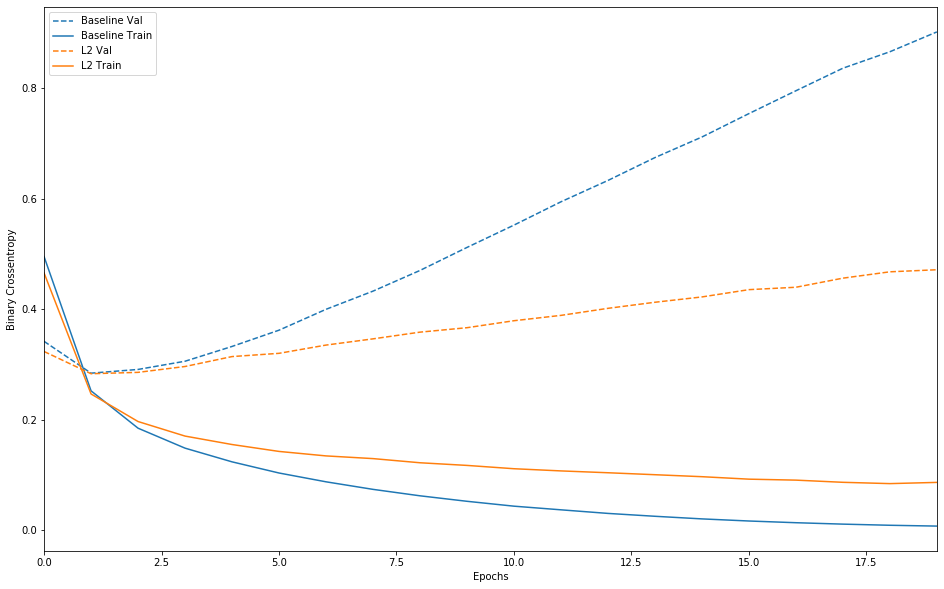

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

#Dropout 적용
regularization 기법들 중 가장 효과적인 방법
훈련 단계에서 몇 개의 원소가 랜덤하게 0이 된다.

테스트 단계에서는 유닛을 drop시키지 않는다.

In [18]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6228 - accuracy: 0.6548 - binary_crossentropy: 0.6228 - val_loss: 0.4887 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.4887
Epoch 2/20
25000/25000 - 3s - loss: 0.4553 - accuracy: 0.8147 - binary_crossentropy: 0.4553 - val_loss: 0.3510 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3510
Epoch 3/20
25000/25000 - 3s - loss: 0.3533 - accuracy: 0.8703 - binary_crossentropy: 0.3533 - val_loss: 0.2911 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2911
Epoch 4/20
25000/25000 - 3s - loss: 0.2914 - accuracy: 0.9001 - binary_crossentropy: 0.2914 - val_loss: 0.2820 - val_accuracy: 0.8837 - val_binary_crossentropy: 0.2820
Epoch 5/20
25000/25000 - 3s - loss: 0.2462 - accuracy: 0.9178 - binary_crossentropy: 0.2462 - val_loss: 0.2776 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2776
Epoch 6/20
25000/25000 - 3s - loss: 0.2147 - accuracy: 0.9275 - binary_crossentropy: 0.2147 - val_loss: 0.2861

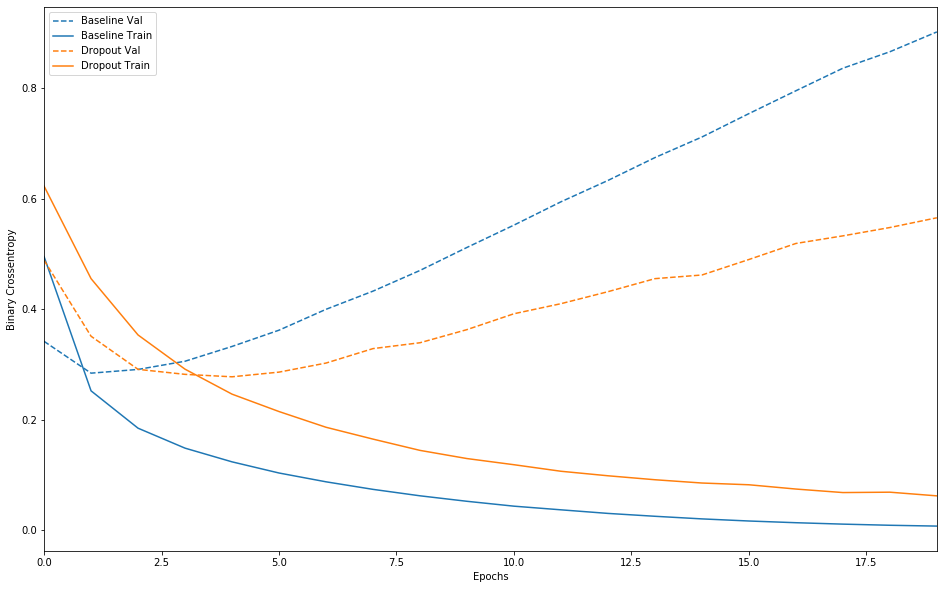

In [19]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

#overfitting 방지를 위한 방법
* train data 더 많이 모으기
* 네트워크 용량 줄이기(네트워크 작게하기)
* weight regularization 추가하기
* dropout 사용하기

이 외 data-augmentation, batch normalization은 다루지 않음.